# Задание 1
## Для реализованной модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.

In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_diabetes

from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
)

In [3]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

def bias(y, z):
    return (y - z)

def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta, subsample=1.0, random_state=42):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []

    if subsample < 1.0 and subsample > 0:
        X_train, _, y_train, _ = train_test_split(
            X_train,
            y_train,
            train_size=subsample,
            random_state=random_state,
        )
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=random_state)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [4]:
def get_error_plot(n_trees, max_depth, eta, X_train, X_test, y_train, y_test, subsample=1.0, random_state=42):

    plt.figure(figsize=(25,7))
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.ylim(0, 30000)

    x = list(range(n_trees))

    print(f'n_trees={n_trees} max_depth={max_depth}')
    for eta_ in eta:
        print(f'\neta={eta_}')

        coefs = [1] * n_trees

        trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta_, subsample, random_state)

        print(f'Train: {mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta_))}')
        print(f'Test: {mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta_))}')

        plt.plot(x, train_errors, label=f'train eta={eta_}')
        plt.plot(x, test_errors, label=f'test eta={eta_}')

    plt.legend()
    plt.show()

n_trees=10 max_depth=3

eta=0.01
Train: 25098.89939109655
Test: 21703.611944258835

eta=0.1
Train: 5774.758723856761
Test: 5356.290852274392

eta=1
Train: 1115.446846457369
Test: 5465.765653675044


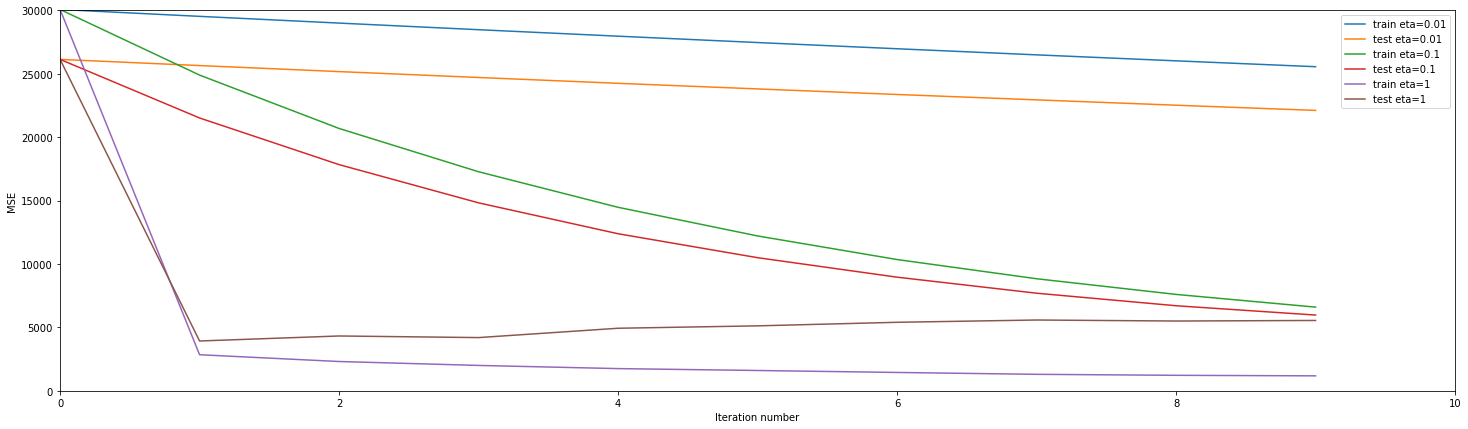

In [5]:
get_error_plot(10, 3, [0.01, 0.1, 1], X_train, X_test, y_train, y_test)

n_trees=10 max_depth=5

eta=0.01
Train: 24945.508028385277
Test: 21604.867052255315

eta=0.1
Train: 4890.642150828356
Test: 5226.659875407335

eta=1
Train: 103.03326854706287
Test: 6438.43697390498


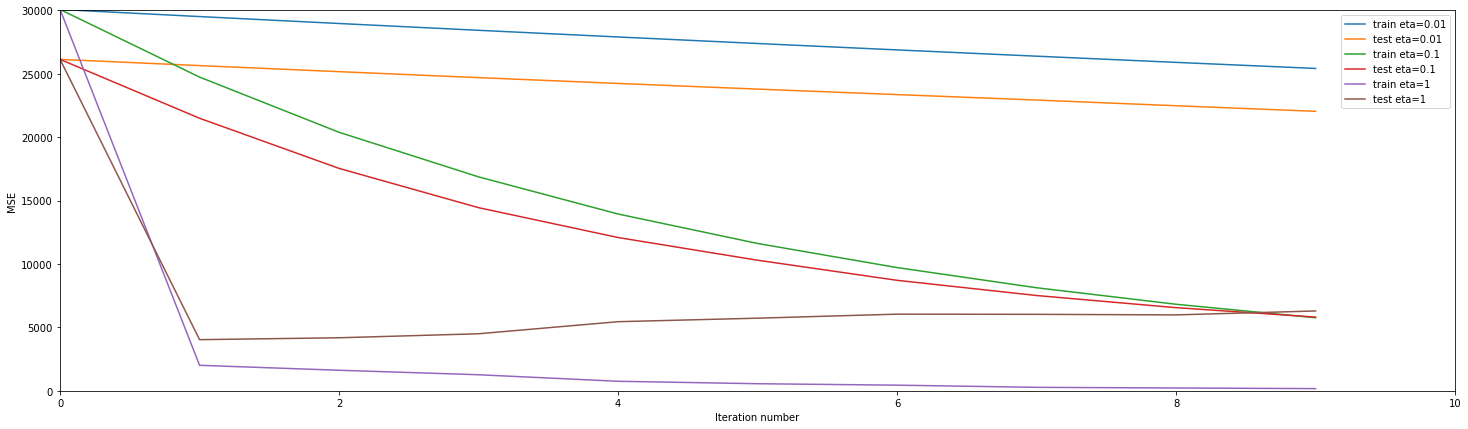

In [6]:
get_error_plot(10, 5, [0.01, 0.1, 1], X_train, X_test, y_train, y_test)

n_trees=10 max_depth=10

eta=0.01
Train: 24599.077483330817
Test: 21700.87936949894

eta=0.1
Train: 3679.6383642693463
Test: 6257.489970735403

eta=1
Train: 1.3810128918652002e-08
Test: 5733.364373285726


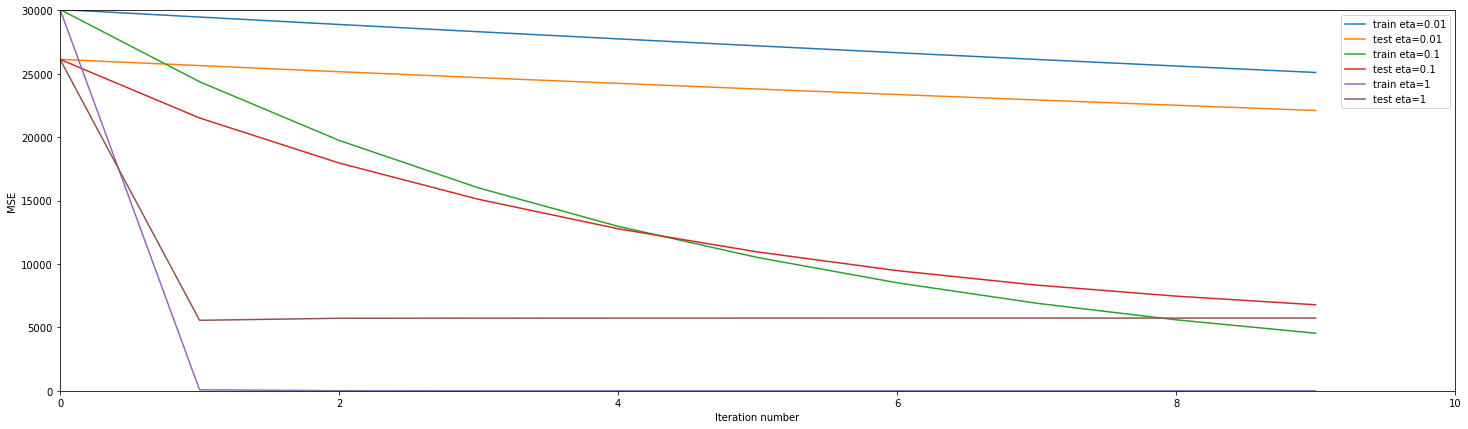

In [7]:
get_error_plot(10, 10, [0.01, 0.1, 1], X_train, X_test, y_train, y_test)

### При n_trees=10 и увеличении max_depth видно, что происходит переобучение модели

### Увеличим n_trees до 25

n_trees=25 max_depth=3

eta=0.01
Train: 19281.54300404252
Test: 16573.37493991987

eta=0.1
Train: 1988.175826410043
Test: 3237.3693262765287

eta=1
Train: 298.31846614162197
Test: 6874.6294515676545


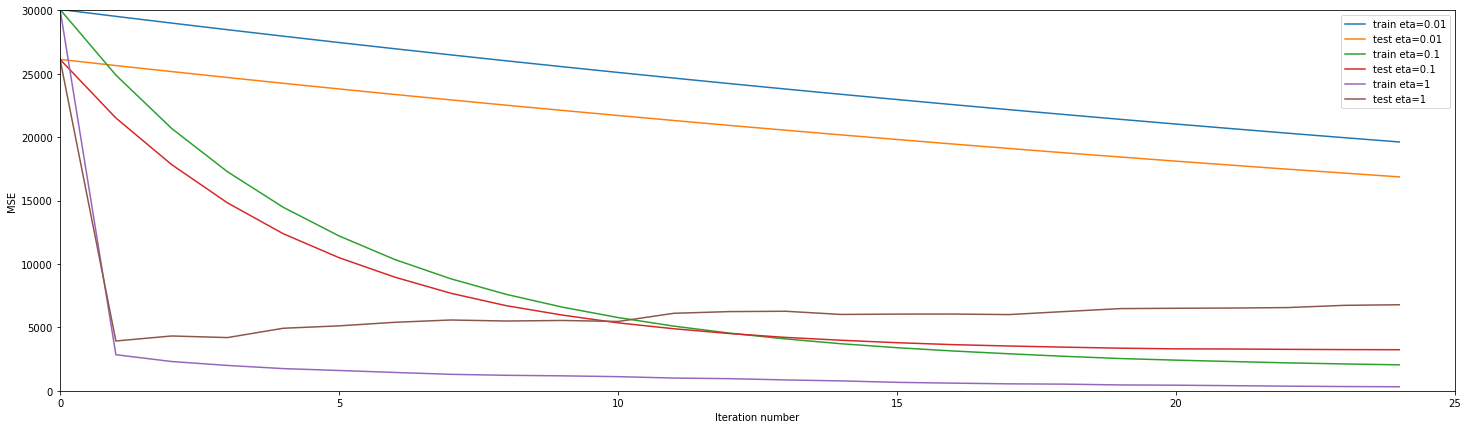

In [8]:
get_error_plot(25, 3, [0.01, 0.1, 1], X_train, X_test, y_train, y_test)

n_trees=25 max_depth=5

eta=0.01
Train: 18928.22520726326
Test: 16248.176241059564

eta=0.1
Train: 859.2529831627928
Test: 3256.7403593467116

eta=1
Train: 2.066529598159525
Test: 6696.033088868036


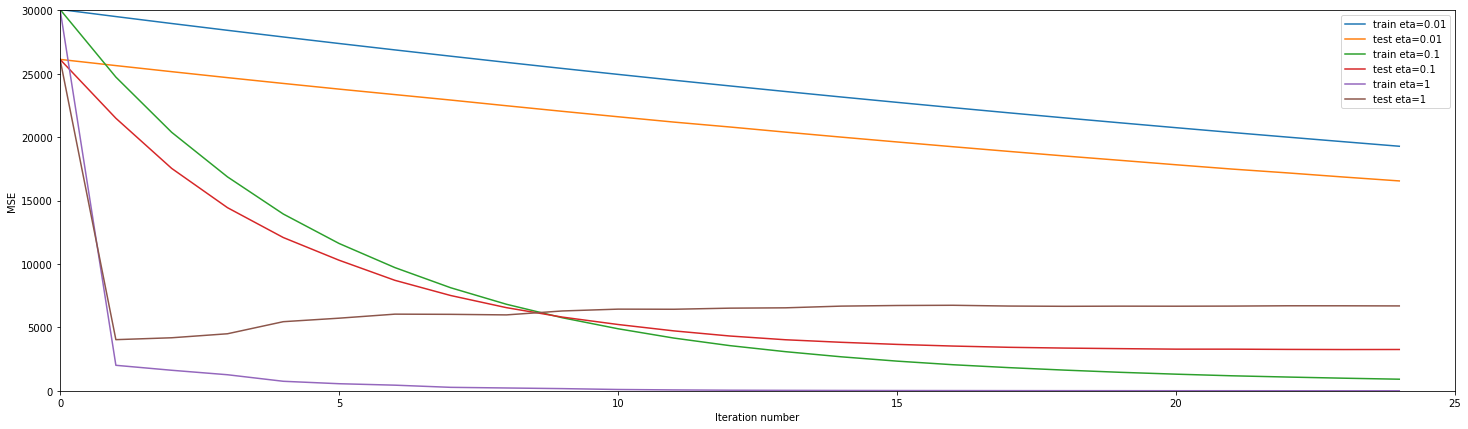

In [9]:
get_error_plot(25, 5, [0.01, 0.1, 1], X_train, X_test, y_train, y_test)

n_trees=25 max_depth=10

eta=0.01
Train: 18206.651905177452
Test: 16697.903951583416

eta=0.1
Train: 159.6436500045947
Test: 4372.7873093888675

eta=1
Train: 1.3534715439702694e-23
Test: 5733.365223659077


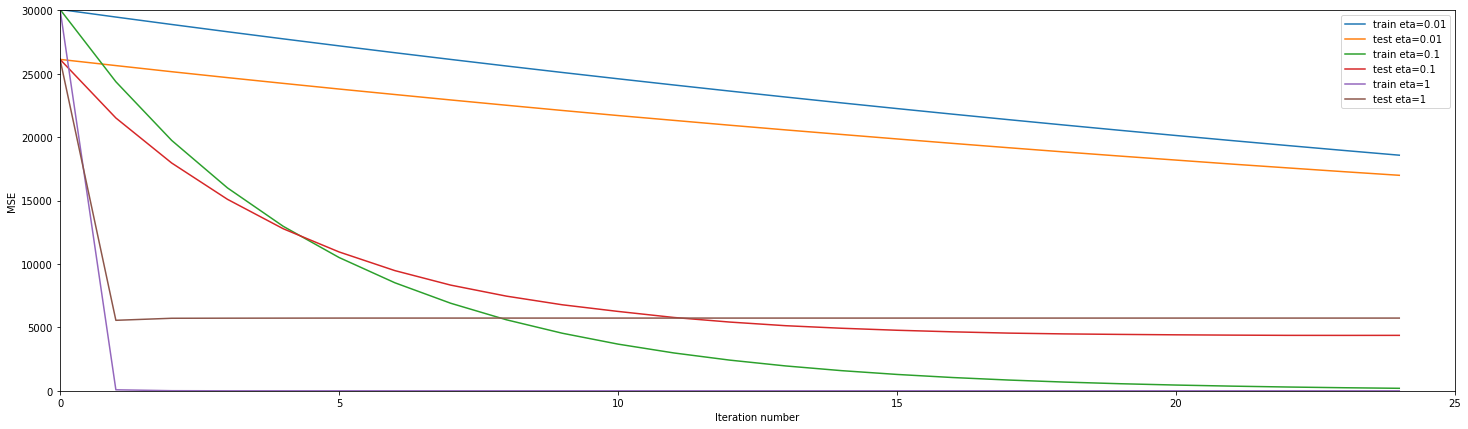

In [10]:
get_error_plot(25, 10, [0.01, 0.1, 1], X_train, X_test, y_train, y_test)

### При n_trees=25 и увеличении max_depth также видно, что происходит переобучение модели

### Лучшие показатели с параметрами
* n_trees=25
* max_depth=3
* eta=0.1

Train: 2025.7673449113324

Test: 2987.9530416250623

Наименьший показатель MSE на тестовой выборке плюс умеренное переобучение.

# Задание 2
## Модифицировать реализованный алгоритм, чтобы получился стохастический градиентный бустинг. Размер подвыборки принять равным 0.5. Сравнить на одном графике кривые изменения ошибки на тестовой выборке в зависимости от числа итераций.

n_trees=25 max_depth=3

eta=0.01
Train: 19137.714562762343
Test: 16493.933287811364

eta=0.1
Train: 2322.41093969623
Test: 3252.4971335056803

eta=1
Train: 3193.181277384646
Test: 5344.733723447474


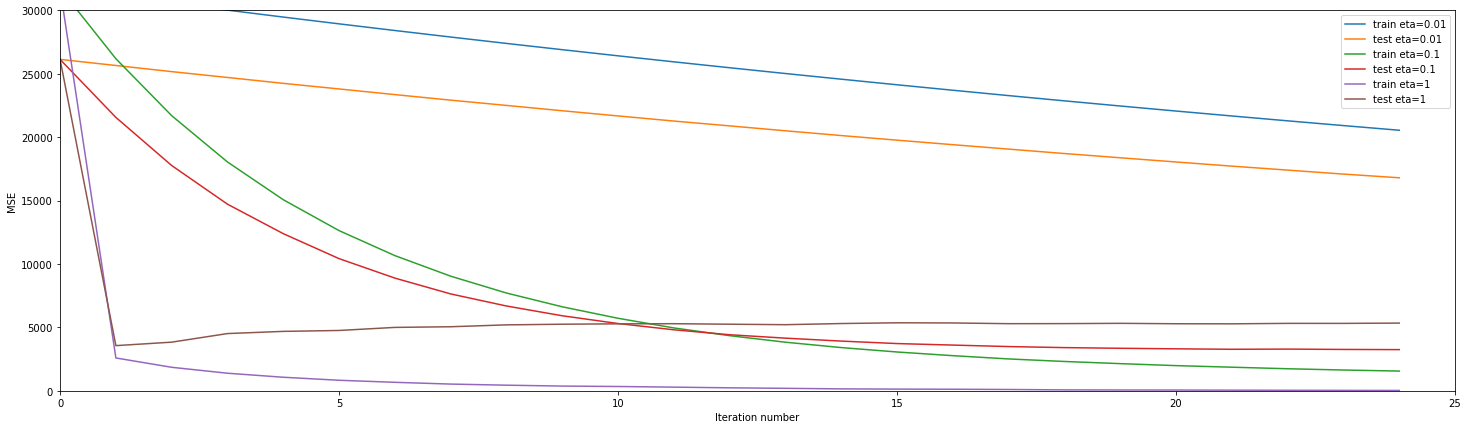

In [11]:
get_error_plot(25, 3, [0.01, 0.1, 1], X_train, X_test, y_train, y_test, subsample=0.5)